<a href="https://colab.research.google.com/github/milda2/RNA-reactivity-prediction/blob/main/RNA_database_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the data in the RMDB Data set. RMDB Data set provides the majority of the sequence profiles available in the RNA Mapping DataBase.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/rmdb_data.csv')
df = pd.read_csv('rmdb_data.csv')
df.head()

sequence_id                                           sequence  \
0  b2c4f7dfcbeb  GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...   
1  c917ebd9ebb1  CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...   
2  85d63477c1f0  GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...   
3  362b98907e64  GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...   
4  9735bca2a802  GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...   

  experiment_type          dataset_name  reads  signal_to_noise  SN_filter  \
0             1M7  16SFWJ_1M7_0001.rdat    NaN           10.357        1.0   
1             1M7  16SFWJ_1M7_0001.rdat    NaN            9.657        1.0   
2             1M7  16SFWJ_1M7_0001.rdat    NaN            9.987        1.0   
3             1M7  16SFWJ_1M7_0001.rdat    NaN            9.718        1.0   
4             1M7  16SFWJ_1M7_0001.rdat    NaN            9.672        1.0   

   reactivity_0001  reactivity_0002  reactivity_0003  ...  \
0            0.781            0.637            0.949  ...   
1            0.478            0.499            0.236  ...   
2            0.152            0.366            1.085  ...   
3            0.566            0.225            0.150  ...   
4            0.442            0.307            0.425  ...   

   reactivity_error_0424  reactivity_error_0425  reactivity_error_0426  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0427  reactivity_error_0428  reactivity_error_0429  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0430  reactivity_error_0431  reactivity_error_0432  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0433  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 873 columns]

These data are similar to the Ribonanza data with experiment_type DMS_MaP but generally use a different experimental readout of the DMS modification profiles.

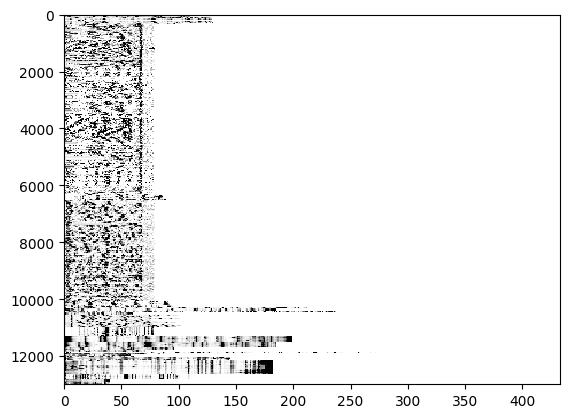

In [ ]:
length = 433
label_names=[f"reactivity_{i+1:04}" for i in range(length)]
experiment_type = 'DMS'
reactivity = df[ df["experiment_type"]==experiment_type][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

**The graph: what is it?**

This graph visualizes the reactivity values from an RNA mapping experiment using DMS (dimethyl sulfate) treatment.

DMS is a chemical that preferentially reacts with unpaired adenines and cytosines in RNA, and the extent of this reaction is often used to infer RNA structure.

Here x-axis of the plot corresponds to the positions along the RNA sequence, from the 1st to the 433rd nucleotide, based on your length variable.

The y-axis represents different RNA sequences or experiments included in the dataset. Each row in the heatmap corresponds to a different RNA sequence or a different measurement from the dataset.

The color intensity in the heatmap indicates the reactivity value for each nucleotide position in each RNA sequence. In the plot, vmin=0 and vmax=1 set the scale for these values. Areas with higher reactivity (closer to 1) are more intensely colored, while lower reactivity (closer to 0) are less intensely colored.



**What it means?**

High reactivity at a particular nucleotide position suggests that the nucleotide is likely unpaired or flexible, as DMS can more easily react with unpaired adenines and cytosines. Low reactivity suggests that the nucleotide is likely paired or in a more structured region, making it less accessible to DMS.

**NEXT**

Also, there are mutate-and-map data in the dataset that come in blocks which show inferred DMS profiles for a target RNA sequence and then sequences that have mutations at each nucleotide.

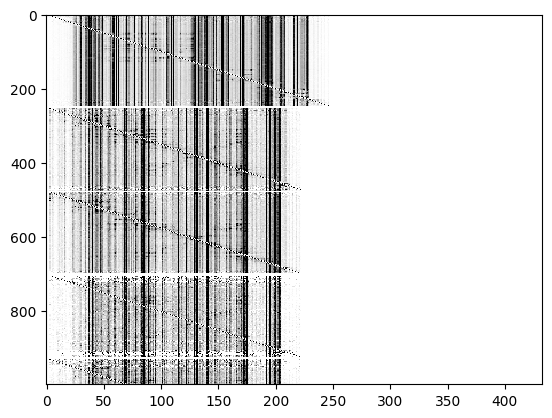

In [ ]:
experiment_type = 'DMS_M2_seq'
# Just show first 1000 profiles so we can see the interesting patterns
reactivity = df[df["experiment_type"]==experiment_type][:1000][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

**What the graph means?**

Here, x axis is the same as previously (positions along the RNA sequence).Each row in the heatmap corresponds to a different RNA sequence – the original sequence and its variants with single-nucleotide mutations.

Changes in reactivity patterns across different rows (sequence variants) can reveal how specific nucleotides are involved in the RNA's structure. For example, if a mutation at a certain position significantly alters the reactivity pattern, it suggests that this nucleotide plays a crucial role in maintaining the structure.

**NEXT**

Co-transcriptional DMS sequence profiles provide a unique view of RNA structure dynamics during the process of transcription.

Co-transcriptional DMS Profiling involves treating RNA with DMS while it is being transcribed. In co-transcriptional profiling, the RNA is probed with DMS at different stages of its transcription, allowing researchers to observe how its structure evolves as it is being synthesized.

Here for y axis, each row corresponds to a different stage of the transcription process. The top rows represent early stages of transcription (shorter RNA fragments), while the bottom rows correspond to later stages (longer RNA fragments).

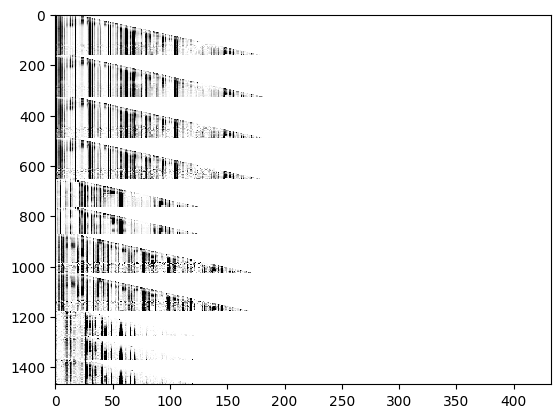

In [ ]:
experiment_type = 'DMS_cotx'
reactivity = df[ df["experiment_type"]==experiment_type][label_names].to_numpy()
plt.imshow( reactivity,vmin=0,vmax=1,aspect='auto',interpolation='none',cmap='binary' )

Starting with test dataset!

In [ ]:
#df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/train_data.csv')
df1= pd.read.csv('train_data.csv')
df.head()

In [11]:
import pandas as pd
train_data = pd.read_csv('train_data_QUICK_START.csv')
len(train_data)

70305

In [12]:
filtered_data = train_data[train_data['experiment_type'] == '2A3_MaP']

# Find duplicates within the filtered dataset based on 'sequence'
duplicate_sequences = filtered_data.duplicated(subset=['sequence'], keep=False)

# Filter to get only duplicate sequences
duplicates = filtered_data[duplicate_sequences]

# Print the sequence and its experiment type for duplicates
print(duplicates[['sequence', 'experiment_type']])


Empty DataFrame
Columns: [sequence, experiment_type]
Index: []


In [13]:
filtered_data = train_data[train_data['experiment_type'] == 'DMS_MaP']

# Find duplicates within the filtered dataset based on 'sequence'
duplicate_sequences = filtered_data.duplicated(subset=['sequence'], keep=False)

# Filter to get only duplicate sequences
duplicates = filtered_data[duplicate_sequences]

# Print the sequence and its experiment type for duplicates
print(duplicates[['sequence', 'experiment_type']])

Empty DataFrame
Columns: [sequence, experiment_type]
Index: []


In [15]:
test_seq = train_data[train_data['experiment_type'] == 'DMS_MaP']
len(test_seq)

35152

In [16]:
reactivity_columns = [col for col in train_data.columns if col.startswith('reactivity_')]
print("Number of reactivity columns:", len(reactivity_columns))

Number of reactivity columns: 412


Tested for not useful reactivities, decided not to do the filtering for now. Do not run the code bellow.

In [18]:
invalid_reactivity_rows = train_data[reactivity_columns].apply(lambda x: (~x.between(0, 1, inclusive=True)).any(), axis=1)
len(invalid_reactivity_rows)

<ipython-input-18-15c3a09fd5ba>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  invalid_reactivity_rows = train_data[reactivity_columns].apply(lambda x: (~x.between(0, 1, inclusive=True)).any(), axis=1)


70305

In [ ]:
train_data_cleaned = train_data[~invalid_reactivity_rows]

One hot encoding for train_data.

CNNs require numerical input. One-hot encoding transforms the categorical nucleotide sequences (A, C, G, U) into a numerical format that CNNs can process, making it a necessary preprocessing step.

One-hot encoding maintains the sequence order without implying any ordinal relationship between the nucleotides, which is crucial for learning the patterns related to reactivity accurately.

In the context of CNNs, each position in the one-hot encoded sequence can be seen as a distinct feature. This allows the convolutional layers to extract patterns and relationships between different parts of the sequence effectively.

The one-hot encoded matrix of sequences is ideal for convolution operations, allowing the CNN to detect motifs and structural patterns within the RNA sequence that are predictive of reactivity.

In [19]:
import numpy as np


In [20]:
def one_hot_encode_sequence(sequence):
    # Mapping of nucleotides to positions
    mapping = {'A': 0, 'C': 1, 'G': 2, 'U': 3}
    # Initialize an empty matrix for the one-hot encoding
    # The matrix dimensions are (len(sequence), 4) for the four nucleotides
    one_hot_matrix = np.zeros((len(sequence), 4))

    for i, nucleotide in enumerate(sequence):
        if nucleotide in mapping:
            one_hot_matrix[i, mapping[nucleotide]] = 1

    return one_hot_matrix

In [21]:
train_data['one_hot_encoded'] = train_data['sequence'].apply(one_hot_encode_sequence)

In [ ]:
print(train_data['one_hot_encoded'].iloc[0])

Preparing the data more: testing NaNs.
**WORK FROM HERE**

In [38]:
rows_with_nans = train_data[reactivity_columns].isna().any(axis=1).sum()
print(f"Rows with at least one NaN: {rows_with_nans}")

Rows with at least one NaN: 70305


In [39]:
nans_per_column = train_data[reactivity_columns].isna().sum()
print(nans_per_column)

reactivity_0001          70305
reactivity_0002          70305
reactivity_0003          70305
reactivity_0004          70305
reactivity_0005          70305
                         ...  
reactivity_error_0202    70305
reactivity_error_0203    70305
reactivity_error_0204    70305
reactivity_error_0205    70305
reactivity_error_0206    70305
Length: 412, dtype: int64


In [41]:
train_data.tail()

sequence_id                                           sequence  \
70300  35ad1b5ee11d  GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGACGAUAGGGAGCC...   
70301  35ad1b5ee11d  GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGACGAUAGGGAGCC...   
70302  35ad49a43e45  GGGAACGACUCGAGUAGAGUCGAAAACGGCGGCCACGUACGAGCUC...   
70303  35ad49a43e45  GGGAACGACUCGAGUAGAGUCGAAAACGGCGGCCACGUACGAGCUC...   
70304  35ad9e978f41  GGGAACGACUCGAGUAGAGUCGAAAAUGAUGGAUUGUGCAAAUUAC...   

      experiment_type                                       dataset_name  \
70300         2A3_MaP  DasLabBigLib_OneMil_RNAmake_designs_delete_lon...   
70301         DMS_MaP  DasLabBigLib_OneMil_RNAmake_designs_delete_lon...   
70302         2A3_MaP                  OpenKnot1_Twist_2A3_EternaPlayers   
70303         DMS_MaP                  OpenKnot1_Twist_DMS_EternaPlayers   
70304         2A3_MaP         DasLabBigLib_OneMil_Coronavirus_genomes_SA   

       reactivity_0001  reactivity_0002  reactivity_0003  reactivity_0004  \
70300              NaN              NaN              NaN              NaN   
70301              NaN              NaN              NaN              NaN   
70302              NaN              NaN              NaN              NaN   
70303              NaN              NaN              NaN              NaN   
70304              NaN              NaN              NaN              NaN   

       reactivity_0005  reactivity_0006  ...  reactivity_error_0198  \
70300              NaN              NaN  ...                    NaN   
70301              NaN              NaN  ...                    NaN   
70302              NaN              NaN  ...                    NaN   
70303              NaN              NaN  ...                    NaN   
70304              NaN              NaN  ...                    NaN   

       reactivity_error_0199  reactivity_error_0200  reactivity_error_0201  \
70300                    NaN                    NaN                    NaN   
70301                    NaN                    NaN                    NaN   
70302                    NaN                    NaN                    NaN   
70303                    NaN                    NaN                    NaN   
70304                    NaN                    NaN                    NaN   

       reactivity_error_0202  reactivity_error_0203  reactivity_error_0204  \
70300                    NaN                    NaN                    NaN   
70301                    NaN                    NaN                    NaN   
70302                    NaN                    NaN                    NaN   
70303                    NaN                    NaN                    NaN   
70304                    NaN                    NaN                    NaN   

       reactivity_error_0205  reactivity_error_0206  \
70300                    NaN                    NaN   
70301                    NaN                    NaN   
70302                    NaN                    NaN   
70303                    NaN                    NaN   
70304                    NaN                    NaN   

                                         one_hot_encoded  
70300  [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  
70301  [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  
70302  [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  
70303  [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  
70304  [[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  

[5 rows x 417 columns]

Defining CNN model for training on train_data & predicting RNA reactivities.

In [23]:
print(train_data['sequence'].iloc[0])

GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGAGUGCGUGGCGAUCACGCGUGUUGCAGCGCGUCUAACAUAGGCAGGGCAACCUGCCGUUUGCUAAACGGAAGACAGAAAAAGAUGUUGUGAUAAUUCGUUAUCACAACAUCAAAAGAAACAACAACAACAAC


In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
one_hot_encoded_sequences = list(train_data['one_hot_encoded'])

# Pad the sequences
# Note: Determine `maxlen` based on your dataset, or leave it unspecified to automatically use the length of the longest sequence
padded_sequences = pad_sequences(one_hot_encoded_sequences, padding='post', maxlen=None, value=0)

# Now you can safely stack
X = np.stack(padded_sequences)


In [33]:
len(X)

70305

In [32]:
reactivity_columns = [col for col in train_data.columns if col.startswith('reactivity_')]
y = train_data[reactivity_columns].values
len(y)


70305

In [34]:
from sklearn.model_selection import train_test_split

# Assuming `X` is your one-hot encoded sequences reshaped into a 3D array and `y` is your reactivities
# Also assuming 'experiment_type' and 'sequence_id' are columns in your DataFrame to allow stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=train_data['experiment_type'],
    random_state=42
)

In [35]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 4)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1]))  # Output layer nodes equal to the number of reactivity values

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error and Mean Absolute Error as metrics

In [36]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
352/352 [==============================] - 19s 47ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/5
352/352 [==============================] - 17s 49ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/5
352/352 [==============================] - 15s 42ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/5
352/352 [==============================] - 16s 47ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/5
352/352 [==============================] - 17s 49ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [37]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

440/440 [==============================] - 3s 7ms/step - loss: nan - mae: nan
Test Loss: nan, Test MAE: nan
